# Ads Click-Through Rate Prediction
Bu projede kullanıcı bilgileri kullanılarak Reklam linkine tıklayıp tıklamadığını tahmin eden Sınıflandırma modeli geliştiriliyor.<br>
Bu modelde kullanılan veriler <a href="https://thecleverprogrammer.com/2023/01/16/ads-click-through-rate-prediction-using-python/"
target="_blank">buradan</a> indirilmiştir.
<br>
<img src="https://gorselprojeler.com/wp-content/uploads/2021/02/internet-reklamciligi-nedir-1170x658.jpeg" width="300px">


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("ad_10000records.csv")

### Keşfedici Veri Analizi (EDA)

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


### Kategorik alanları sayıya dönüştürme
Yukarıda hiç bir alanda boş veri olmadığı görülmektedir. Bu nedenle sadece alanları sayıya çevirmek yeterli olacaktır.

In [7]:
df["Gender"].value_counts()

Gender
1    5376
0    4624
Name: count, dtype: int64

In [6]:
df["Gender"]=np.where(df["Gender"]=="Female", 1, 0)

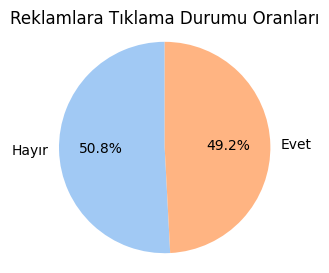

In [21]:
plt.figure(figsize=(3,3))
sns.set_palette('pastel')
plt.pie(df["Clicked on Ad"].value_counts(), labels=["Hayır", "Evet"], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Reklamlara Tıklama Durumu Oranları')
plt.show()

Sınıf verileri dengeli dağıldığı için dengelemeye gerek duyulmamıştır.

## Modelleme

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

g = GaussianNB()
b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()

def algo_test(x, y):
    modeller=[g, b, l, d, r, gb, kn]
    isimler=["GaussianNB", "BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(np.array(x_test) if model==kn else x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin))
        recall.append(recall_score(y_test, tahmin))
        f1.append(f1_score(y_test, tahmin))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)

In [14]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [15]:
x=df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Gender']]
y=df[["Clicked on Ad"]]

In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Gender                    10000 non-null  int32  
dtypes: float64(4), int32(1)
memory usage: 351.7 KB


In [17]:
x.shape, y.shape

((10000, 5), (10000, 1))

In [20]:
algo_test(x,y)

Veriler hazır modeller deneniyor
GaussianNB()  modeli eğitiliyor!..
[[1240  303]
 [ 535  922]]
BernoulliNB()  modeli eğitiliyor!..
[[753 790]
 [636 821]]
LogisticRegression()  modeli eğitiliyor!..
[[1095  448]
 [ 467  990]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[1188  355]
 [ 434 1023]]
RandomForestClassifier()  modeli eğitiliyor!..
[[1228  315]
 [ 365 1092]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[1285  258]
 [ 439 1018]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[1193  350]
 [ 394 1063]]
Eğitim tamamlandı.
En başarılı model:  RandomForestClassifier
Confusion Matrix:
[[1228  315]
 [ 365 1092]]
classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1543
           1       0.78      0.75      0.76      1457

    accuracy                           0.77      3000
   macro avg       0.77      0.77      0.77      3000
weighted avg       0.77      0.77      0.77      3000

Diğer Modeller:


,Accuracy,Precision,Recall,F1
RandomForestClassifier,0.773333,0.776119,0.749485,0.762570
GradientBoostingClassifier,0.767667,0.797806,0.698696,0.744969
KNeighborsClassifier,0.752000,0.752300,0.729581,0.740767
DecisionTreeClassifier,0.737000,0.742380,0.702128,0.721693
GaussianNB,0.720667,0.752653,0.632807,0.687547
LogisticRegression,0.695000,0.688456,0.679478,0.683938
BernoulliNB,0.524667,0.509621,0.563487,0.535202


# Sonuç
Kullanıcı bilgileri kullanılarak internet reklamlarına tıklanma durumunu tahmin eden model geliştirildi. 
Denenen sınıflandırma modelleri içerisinde
en yüksek başarı RandomForestClassifier modeli ile %77 oranında sağlandı.